In [52]:
 #------------------This example uses Python 2.7 and the python-request library.---------------------------

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'cca33dd3-61ec-4365-91ec-f02c7450c652',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


# I had to go in anacondaprompt in windows -> write "jupyter notebook --NotebookApp.iopub_data_rate_limit = 1e10"



{'status': {'timestamp': '2024-07-10T16:34:59.461Z', 'error_code': 0, 'error_message': None, 'elapsed': 55, 'credit_count': 1, 'notice': None, 'total_count': 9996}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11595, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [54]:
import pandas as pd

#----------------------This allows you to see all the colummns, not just like 15-----------------------
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_columns', None)

In [56]:
#----------------------This normalized the data and makes it all pretty in a dataframe--------------------------
df = pd.json_normalize(data['data'])

#---------------------Creates a column that register the timestamp----------------------------------
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11595,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19719809.00000,19719809.00000,False,NaN,1,NaN,NaN,None,2024-07-10T16:34:00.000Z,57953.23745,27061048309.98565,-4.06640,0.13950,0.63561,-4.05902,-16.94280,-5.35201,-16.96942,1142826773439.16650,53.37640,1217017986443.10010,None,2024-07-10T16:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:11.146860
1,1027,Ethereum,ETH,ethereum,9126,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120207304.75119,120207304.75119,True,NaN,2,NaN,NaN,None,2024-07-10T16:33:00.000Z,3140.99035,14535081006.52076,-10.10650,0.98651,2.25492,-5.18350,-14.76641,7.28159,-10.17197,377569983854.17816,17.63460,377569983854.17999,None,2024-07-10T16:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:11.146860
2,825,Tether USDt,USDT,tether,91272,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112259808785.14278,116076856616.98984,True,NaN,3,NaN,NaN,None,2024-07-10T16:33:00.000Z,1.00008,49367588648.52212,-9.28640,0.03058,0.00094,0.14456,0.03644,0.03844,0.00955,112268356725.67007,5.24360,116085695203.82001,None,2024-07-10T16:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-10 10:35:11.146860
3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147582525.33867,147582525.33867,False,NaN,4,NaN,NaN,None,2024-07-10T16:33:00.000Z,526.96077,1623246782.33680,0.00120,0.21315,1.77888,-5.64366,-18.60884,-10.95881,-12.13003,77770201726.94499,3.63230,77770201726.94000,None,2024-07-10T16:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:11.146860
4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,463673901.80212,579834714.02539,True,NaN,5,NaN,NaN,None,2024-07-10T16:33:00.000Z,141.70739,2144820470.40460,-17.65470,0.49533,-0.08153,-0.48154,-12.11669,-3.11317,-17.98243,65706017746.19608,3.06880,82166863093.95000,None,2024-07-10T16:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:11.146860
5,3408,USDC,USDC,usd-coin,20895,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33974674743.98173,33974674743.98173,False,NaN,6,NaN,NaN,None,2024-07-10T16:33:00.000Z,1.00009,5437318137.48105,-4.29470,0.01257,0.00774,0.01223,0.01908,0.00754,-0.01130,33977888303.03112,1.58700,33977888303.03000,None,2024-07-10T16:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-07-10 10:35:11.146860
6,52,XRP,XRP,xrp,1351,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55723063839.00000,99987471767.00000,False,NaN,7,NaN,NaN,None,2024-07-10T16:34:00.000Z,0.43334,969444886.79863,-6.14430,0.23198,0.20140,-7.42949,-13.80239,-14.53449,-28.36836,24147305831.46610,1.12780,43334490546.38000,None,2024-07-10T16:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:11.146860
7,11419,Toncoin,TON,toncoin,454,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2506216414.78055,5108804699.00507,True,NaN,8,3414166606.00000,24892890848.07505,None,2024-07-10T16:33:00.000Z,7.29106,230472142.30992,-11.66180,0.33923,0.20485,-7.32689,1.53938,6.58659,0.92424,18272972251.89547,0.85350,37248597509.26000,None,2024-07-10

In [58]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'cca33dd3-61ec-4365-91ec-f02c7450c652',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # -----------------Normalizes, add the timestamp and then append all the new df to the existing df------------------
    """Asi teníamos el código para agregar los datos al df sin crear un csv
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])
    """
    # -------------------------------------Adding data to a CSV------------------------------------------
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    #Check if the file exists
    if not os.path.isfile(r'C:\Users\Jona\PORTFOLIO PROJECTS\CRYPTO API PULL\api.csv'):
        df.to_csv(r'C:\Users\Jona\PORTFOLIO PROJECTS\CRYPTO API PULL\api.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Jona\PORTFOLIO PROJECTS\CRYPTO API PULL\api.csv', mode = 'a', header = False)
    

In [60]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API completed')
    sleep(60) #sleeps 60 sec
exit()

API completed
API completed
API completed
API completed
API completed


KeyboardInterrupt: 

In [62]:
df_ = pd.read_csv(r'C:\Users\Jona\PORTFOLIO PROJECTS\CRYPTO API PULL\api.csv')
df_

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11595,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19719809.00000,19719809.00000,False,NaN,1,NaN,NaN,NaN,2024-07-10T16:34:00.000Z,57953.23745,27061048309.98565,-4.06640,0.13950,0.63561,-4.05902,-16.94280,-5.35201,-16.96942,1142826773439.16650,53.37640,1217017986443.10010,NaN,2024-07-10T16:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:52.491370
1,1,1027,Ethereum,ETH,ethereum,9126,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120207304.75119,120207304.75119,True,NaN,2,NaN,NaN,NaN,2024-07-10T16:33:00.000Z,3140.99035,14535081006.52076,-10.10650,0.98651,2.25492,-5.18350,-14.76641,7.28159,-10.17197,377569983854.17816,17.63460,377569983854.17999,NaN,2024-07-10T16:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:52.491370
2,2,825,Tether USDt,USDT,tether,91272,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112259808785.14278,116076856616.98984,True,NaN,3,NaN,NaN,NaN,2024-07-10T16:33:00.000Z,1.00008,49367588648.52212,-9.28640,0.03058,0.00094,0.14456,0.03644,0.03844,0.00955,112268356725.67007,5.24360,116085695203.82001,NaN,2024-07-10T16:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-10 10:35:52.491370
3,3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147582525.33867,147582525.33867,False,NaN,4,NaN,NaN,NaN,2024-07-10T16:33:00.000Z,526.96077,1623246782.33680,0.00120,0.21315,1.77888,-5.64366,-18.60884,-10.95881,-12.13003,77770201726.94499,3.63230,77770201726.94000,NaN,2024-07-10T16:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:52.491370
4,4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,463673901.80212,579834714.02539,True,NaN,5,NaN,NaN,NaN,2024-07-10T16:33:00.000Z,141.70739,2144820470.40460,-17.65470,0.49533,-0.08153,-0.48154,-12.11669,-3.11317,-17.98243,65706017746.19608,3.06880,82166863093.95000,NaN,2024-07-10T16:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:52.491370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,1958,TRON,TRX,tron,999,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,87143010504.68529,87143059277.18208,True,NaN,11,71659659264.00000,9410598959.17662,NaN,2024-07-10T16:38:00.000Z,0.13132,276085415.74998,-10.94560,0.03606,1.54317,1.70138,11.98259,4.17949,10.00690,11443927202.24516,0.53450,11443933607.22000,NaN,2024-07-10T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:39:55.851400
71,11,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,394393250.76826,443739620.76826,False,NaN,12,NaN,NaN,NaN,2024-07-10T16:38:00.000Z,26.43416,287165626.55162,-21.66910,0.58510,3.20376,-1.88846,-19.38343,-21.86635,-42.28044,10425454452.32048,0.48690,18920216445.66000,NaN,2024-07-10T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:39:55.851400
72,12,5994,Shiba Inu,SHIB,shiba-inu,844,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589270821510430.00000,589519289430517.62500,False,NaN,13,NaN,NaN,NaN,2024-07-10T16:38:00.000Z,0.00

In [64]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [66]:
df_

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11595,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19719809.00000,19719809.00000,False,NaN,1,NaN,NaN,NaN,2024-07-10T16:34:00.000Z,57953.23745,27061048309.98565,-4.06640,0.13950,0.63561,-4.05902,-16.94280,-5.35201,-16.96942,1142826773439.16650,53.37640,1217017986443.10010,NaN,2024-07-10T16:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:52.491370
1,1,1027,Ethereum,ETH,ethereum,9126,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120207304.75119,120207304.75119,True,NaN,2,NaN,NaN,NaN,2024-07-10T16:33:00.000Z,3140.99035,14535081006.52076,-10.10650,0.98651,2.25492,-5.18350,-14.76641,7.28159,-10.17197,377569983854.17816,17.63460,377569983854.17999,NaN,2024-07-10T16:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:52.491370
2,2,825,Tether USDt,USDT,tether,91272,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112259808785.14278,116076856616.98984,True,NaN,3,NaN,NaN,NaN,2024-07-10T16:33:00.000Z,1.00008,49367588648.52212,-9.28640,0.03058,0.00094,0.14456,0.03644,0.03844,0.00955,112268356725.67007,5.24360,116085695203.82001,NaN,2024-07-10T16:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-07-10 10:35:52.491370
3,3,1839,BNB,BNB,bnb,2190,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147582525.33867,147582525.33867,False,NaN,4,NaN,NaN,NaN,2024-07-10T16:33:00.000Z,526.96077,1623246782.33680,0.00120,0.21315,1.77888,-5.64366,-18.60884,-10.95881,-12.13003,77770201726.94499,3.63230,77770201726.94000,NaN,2024-07-10T16:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:52.491370
4,4,5426,Solana,SOL,solana,699,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,463673901.80212,579834714.02539,True,NaN,5,NaN,NaN,NaN,2024-07-10T16:33:00.000Z,141.70739,2144820470.40460,-17.65470,0.49533,-0.08153,-0.48154,-12.11669,-3.11317,-17.98243,65706017746.19608,3.06880,82166863093.95000,NaN,2024-07-10T16:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:35:52.491370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,10,1958,TRON,TRX,tron,999,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,87143010504.68529,87143059277.18208,True,NaN,11,71659659264.00000,9410598959.17662,NaN,2024-07-10T16:38:00.000Z,0.13132,276085415.74998,-10.94560,0.03606,1.54317,1.70138,11.98259,4.17949,10.00690,11443927202.24516,0.53450,11443933607.22000,NaN,2024-07-10T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:39:55.851400
71,11,5805,Avalanche,AVAX,avalanche,750,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,394393250.76826,443739620.76826,False,NaN,12,NaN,NaN,NaN,2024-07-10T16:38:00.000Z,26.43416,287165626.55162,-21.66910,0.58510,3.20376,-1.88846,-19.38343,-21.86635,-42.28044,10425454452.32048,0.48690,18920216445.66000,NaN,2024-07-10T16:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-07-10 10:39:55.851400
72,12,5994,Shiba Inu,SHIB,shiba-inu,844,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589270821510430.00000,589519289430517.62500,False,NaN,13,NaN,NaN,NaN,2024-07-10T16:38:00.000Z,0.00

In [68]:
df3 = df_.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13212,0.69445,-4.05417,-16.98150,-5.33302,-16.91539
Ethereum,0.81076,2.19503,-5.22079,-14.89414,7.20279,-10.18383
Tether USDt,0.02246,-0.00286,0.13870,0.02957,0.04008,0.00229
BNB,0.17773,1.90086,-5.57304,-18.59097,-10.83196,-12.02210
Solana,0.52309,0.17340,-0.27342,-12.04364,-2.98473,-17.86587
USDC,-0.00345,-0.00004,0.00686,0.00489,0.00211,-0.02150
XRP,0.15730,0.18361,-7.36421,-13.78112,-14.56492,-28.34833
Toncoin,0.31093,0.31903,-7.36132,1.53445,6.80221,0.81342
Dogecoin,0.49585,2.07561,-7.42397,-24.56733,-24.06991,-42.44574


In [70]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h      0.13212
           quote.USD.percent_change_24h     0.69445
           quote.USD.percent_change_7d     -4.05417
           quote.USD.percent_change_30d   -16.98150
           quote.USD.percent_change_60d    -5.33302
                                             ...   
Chainlink  quote.USD.percent_change_24h     0.46195
           quote.USD.percent_change_7d     -9.96002
           quote.USD.percent_change_30d   -19.12200
           quote.USD.percent_change_60d    -4.08240
           quote.USD.percent_change_90d   -24.16007
Length: 90, dtype: float64

In [72]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                            
Bitcoin   quote.USD.percent_change_1h    0.13212
          quote.USD.percent_change_24h   0.69445
          quote.USD.percent_change_7d   -4.05417
          quote.USD.percent_change_30d -16.98150
          quote.USD.percent_change_60d  -5.33302
...                                          ...
Chainlink quote.USD.percent_change_24h   0.46195
          quote.USD.percent_change_7d   -9.96002
          quote.USD.percent_change_30d -19.12200
          quote.USD.percent_change_60d  -4.08240
          quote.USD.percent_change_90d -24.16007

[90 rows x 1 columns]

In [74]:
df5.count()

values    90
dtype: int64

In [76]:
#----------------create an index column-------------------------
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.13212
1,Bitcoin,quote.USD.percent_change_24h,0.69445
2,Bitcoin,quote.USD.percent_change_7d,-4.05417
3,Bitcoin,quote.USD.percent_change_30d,-16.98150
4,Bitcoin,quote.USD.percent_change_60d,-5.33302
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.46195
86,Chainlink,quote.USD.percent_change_7d,-9.96002
87,Chainlink,quote.USD.percent_change_30d,-19.12200
88,Chainlink,quote.USD.percent_change_60d,-4.08240


In [78]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13212
1,Bitcoin,quote.USD.percent_change_24h,0.69445
2,Bitcoin,quote.USD.percent_change_7d,-4.05417
3,Bitcoin,quote.USD.percent_change_30d,-16.98150
4,Bitcoin,quote.USD.percent_change_60d,-5.33302
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,0.46195
86,Chainlink,quote.USD.percent_change_7d,-9.96002
87,Chainlink,quote.USD.percent_change_30d,-19.12200
88,Chainlink,quote.USD.percent_change_60d,-4.08240


In [80]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.13212
1,Bitcoin,24h,0.69445
2,Bitcoin,7d,-4.05417
3,Bitcoin,30d,-16.98150
4,Bitcoin,60d,-5.33302
...,...,...,...
85,Chainlink,24h,0.46195
86,Chainlink,7d,-9.96002
87,Chainlink,30d,-19.12200
88,Chainlink,60d,-4.08240


In [82]:
#-----------------Graphics imports---------------------------

import seaborn as sns
import matplotlib.pyplot as plt

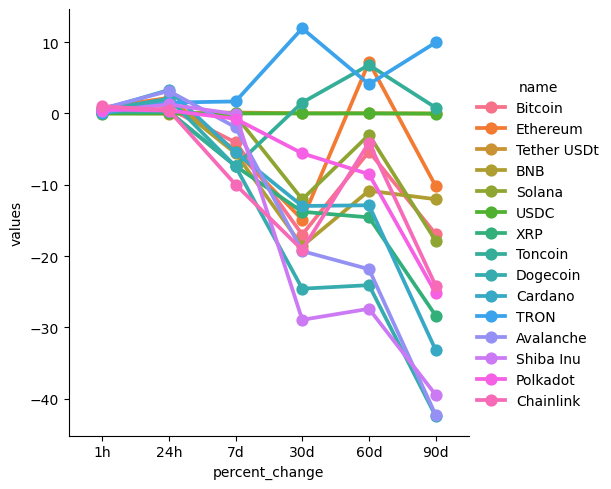

In [84]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [94]:
df10 = df_[['name','quote.USD.price','timestamp']]
df10

,name,quote.USD.price,timestamp
0,Bitcoin,57953.23745,2024-07-10 10:35:52.491370
1,Ethereum,3140.99035,2024-07-10 10:35:52.491370
2,Tether USDt,1.00008,2024-07-10 10:35:52.491370
3,BNB,526.96077,2024-07-10 10:35:52.491370
4,Solana,141.70739,2024-07-10 10:35:52.491370
...,...,...,...
70,TRON,0.13132,2024-07-10 10:39:55.851400
71,Avalanche,26.43416,2024-07-10 10:39:55.851400
72,Shiba Inu,0.00002,2024-07-10 10:39:55.851400
73,Polkadot,6.15819,2024-07-10 10:39:55.851400


In [96]:
df10.query("name == 'Bitcoin'")

,name,quote.USD.price,timestamp
0,Bitcoin,57953.23745,2024-07-10 10:35:52.491370
15,Bitcoin,57955.97787,2024-07-10 10:36:54.193818
30,Bitcoin,57934.96589,2024-07-10 10:37:54.793155
45,Bitcoin,57928.98209,2024-07-10 10:38:55.333799
60,Bitcoin,57896.06344,2024-07-10 10:39:55.851400


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

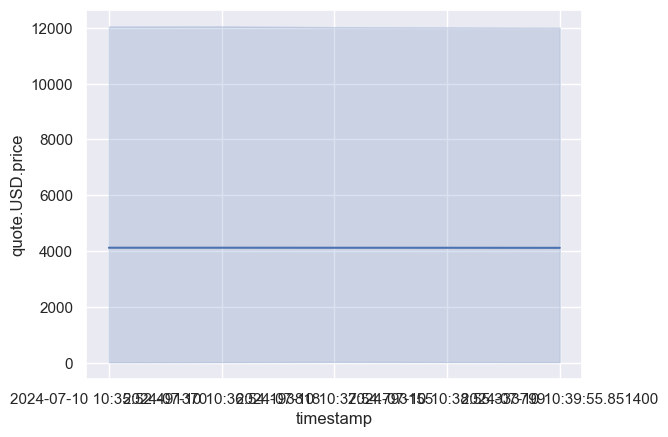

In [100]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)